# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
sinasc_raw['latitude'] = pd.cut(sinasc_raw['munResLat'], bins=[-float('inf'), -10.5, float('inf')], labels=['Abaixo de -10.5', 'Acima de -10.5'])

In [9]:
sinasc_raw.groupby('latitude').agg({
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDGESTANT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

C:\Users\gusta\AppData\Local\Temp\ipykernel_11372\3501849728.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby('latitude').agg({


CONSULTAS                                               \
                      sum      mean min max median       std       var   
latitude                                                                 
Abaixo de -10.5     48000  3.694297   1   9    4.0  0.643372  0.413928   
Acima de -10.5      48662  3.467436   1   9    4.0  0.888240  0.788970   

                QTDGESTANT                                                  
                       sum      mean  min   max median       std       var  
latitude                                                                    
Abaixo de -10.5    15301.0  1.186032  0.0  15.0    1.0  1.304777  1.702444  
Acima de -10.5     17615.0  1.364024  0.0  52.0    1.0  1.492482  2.227501

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [11]:
sinasc_raw['Area'] = pd.cut(sinasc_raw['munResArea'], bins=[-float('inf'), 3000, float('inf')], labels=['Abaixo de 3000', 'Acima de 3000'])

In [12]:
sinasc_raw.groupby('Area').agg({
    'QTDPARTCES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

C:\Users\gusta\AppData\Local\Temp\ipykernel_11372\2330890101.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby('Area').agg({


QTDPARTCES                                                  \
                      sum      mean  min   max median       std       var   
Area                                                                        
Abaixo de 3000     2952.0  0.572981  0.0   5.0    0.0  0.749368  0.561553   
Acima de 3000     10184.0  0.507070  0.0  12.0    0.0  0.744981  0.554997   

               QTDPARTNOR                                                  
                      sum      mean  min   max median       std       var  
Area                                                                       
Abaixo de 3000     1912.0  0.371334  0.0  10.0    0.0  0.856441  0.733490  
Acima de 3000     12659.0  0.632982  0.0  41.0    0.0  1.278932  1.635668

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [14]:
sinasc_raw['Alt'] = pd.qcut(sinasc_raw['munResAlt'], q = 3)
sinasc_raw['Alt']

0        (177.0, 595.0]
1        (177.0, 595.0]
2        (177.0, 595.0]
3        (177.0, 595.0]
4        (177.0, 595.0]
              ...      
27023    (177.0, 595.0]
27024    (177.0, 595.0]
27025    (177.0, 595.0]
27026    (177.0, 595.0]
27027    (177.0, 595.0]
Name: Alt, Length: 27028, dtype: category
Categories (3, interval[float64, right]): [(84.999, 111.0] < (111.0, 177.0] < (177.0, 595.0]]

In [15]:
sinasc_raw.groupby('Alt').agg({
    'QTDGESTANT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'KOTELCHUCK': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

C:\Users\gusta\AppData\Local\Temp\ipykernel_11372\3036194919.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby('Alt').agg({


QTDGESTANT                                                  \
                       sum      mean  min   max median       std       var   
Alt                                                                          
(84.999, 111.0]    11762.0  1.461118  0.0  52.0    1.0  1.565417  2.450532   
(111.0, 177.0]     11997.0  1.242826  0.0  15.0    1.0  1.399885  1.959678   
(177.0, 595.0]      9157.0  1.128821  0.0  12.0    1.0  1.207607  1.458314   

                KOTELCHUCK                                               
                       sum      mean min max median       std       var  
Alt                                                                      
(84.999, 111.0]      49722  5.471171   1   9    5.0  2.683365  7.200445  
(111.0, 177.0]       47450  4.860684   1   9    5.0  1.735287  3.011221  
(177.0, 595.0]       37290  4.560352   1   9    5.0  1.436544  2.063658

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [17]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [18]:
sinasc_imediatas = sinasc_raw.set_index('munResNome')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2019-11-12'),
  Text(0.0, 0, '2019-01-01'),
  Text(50.0, 0, '2019-02-20'),
  Text(100.0, 0, '2019-04-11'),
  Text(150.0, 0, '2019-05-31'),
  Text(200.0, 0, '2019-07-20'),
  Text(250.0, 0, '2019-09-08'),
  Text(300.0, 0, '2019-10-28'),
  Text(350.0, 0, '2019-12-17'),
  Text(400.0, 0, '')])

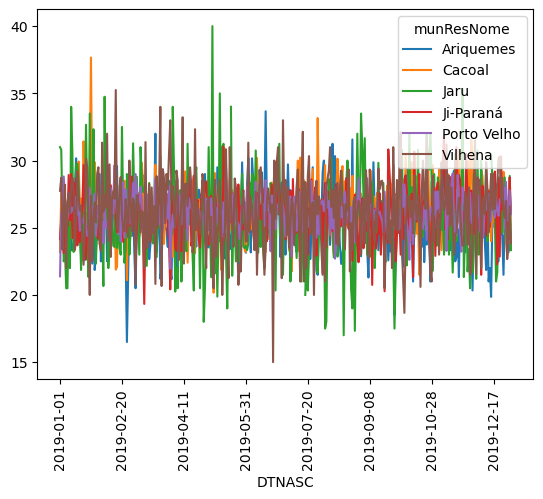

In [19]:
sinasc_imediatas.groupby(['DTNASC', imediatas])['IDADEMAE'].mean().unstack().plot()
plt.xticks(rotation=90)

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [22]:
idh = pd.read_excel('IDH.xlsx')

In [23]:
idh.drop('Lugar', axis='columns', inplace=True)

In [24]:
idh.set_index('Municipio', inplace=True)
idh

,IDH municipal
Municipio,
Porto Velho,0.736
Vilhena,0.731
Cacoal,0.718
Ji-Paraná,0.714
Pimenta Bueno,0.710
Ariquemes,0.702
Rolim de Moura,0.700
Cerejeiras,0.692
Jaru,0.689


In [25]:
sinasc_idh = sinasc_raw.set_index('munResNome').join(idh, how= 'outer')
sinasc_idh.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,latitude,Area,Alt,IDH municipal
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1.0,2679477.0,110001.0,1.0,19.0,5.0,8 a 11 anos,NaN,0.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(177.0, 595.0]",NaN
Alta Floresta D'Oeste,1.0,2679477.0,110001.0,1.0,29.0,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(177.0, 595.0]",NaN
Alta Floresta D'Oeste,1.0,2679477.0,110001.0,1.0,37.0,9.0,8 a 11 anos,513205.0,2.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(177.0, 595.0]",NaN
Alta Floresta D'Oeste,1.0,2516500.0,110001.0,1.0,30.0,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(177.0, 595.0]",NaN
Alta Floresta D'Oeste,1.0,2516500.0,110001.0,1.0,33.0,5.0,1 a 3 anos,621005.0,2.0,1.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(177.0, 595.0]",NaN


In [26]:
sinasc_idh['Faixa_IDH'] = pd.cut(sinasc_idh['IDH municipal'], bins=[0, 0.5, 0.6, 0.7, 0.8, 1], labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto'])

In [27]:
sinasc_idh.dropna(inplace= True, subset= 'IDH municipal')

In [28]:
sinasc_idh.groupby('Faixa_IDH')[['QTDFILMORT', 'QTDFILVIVO', 'IDADEMAE', 'APGAR5']].mean()

C:\Users\gusta\AppData\Local\Temp\ipykernel_11372\1167177695.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_idh.groupby('Faixa_IDH')[['QTDFILMORT', 'QTDFILVIVO', 'IDADEMAE', 'APGAR5']].mean()


,QTDFILMORT,QTDFILVIVO,IDADEMAE,APGAR5
Faixa_IDH,,,,
Muito Baixo,NaN,NaN,NaN,NaN
Baixo,0.253521,1.05627,25.269231,9.267925
Médio,0.270839,1.06446,25.937221,9.210331
Alto,0.273072,1.04487,26.261678,9.176015
Muito Alto,NaN,NaN,NaN,NaN


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [30]:
ifdm = pd.read_csv('IFDM.csv', sep=';')
ifdm.head()

,MUNICIPIO,IFDM
0,Ariquemes,0.7746
1,Vilhena,0.7465
2,Pimenta Bueno,0.7383
3,Porto Velho,0.7257
4,Ji-Paraná,0.7117


In [31]:
ifdm.set_index('MUNICIPIO', inplace=True)

In [32]:
sinasc_ifdm = sinasc_raw.set_index('munResNome').join(ifdm, how= 'outer')

In [33]:
sinasc_ifdm['IFDM_descritiva'] = pd.cut(sinasc_ifdm['IFDM'], bins=[0, 0.4, 0.6, 0.8, float('inf')], labels=['Baixo', 'Regular', 'Moderado', 'Alto'])
sinasc_ifdm['IFDM_descritiva'].dropna().value_counts()

IFDM_descritiva
Moderado    20846
Regular      3669
Baixo           0
Alto            0
Name: count, dtype: int64

In [34]:
sinasc_ifdm.groupby('IFDM_descritiva')[['QTDFILMORT', 'QTDFILVIVO', 'IDADEMAE', 'APGAR5']].mean()

C:\Users\gusta\AppData\Local\Temp\ipykernel_11372\4074093677.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_ifdm.groupby('IFDM_descritiva')[['QTDFILMORT', 'QTDFILVIVO', 'IDADEMAE', 'APGAR5']].mean()


,QTDFILMORT,QTDFILVIVO,IDADEMAE,APGAR5
IFDM_descritiva,,,,
Baixo,NaN,NaN,NaN,NaN
Regular,0.264967,1.172404,25.412005,9.233004
Moderado,0.268574,1.023916,26.245598,9.169660
Alto,NaN,NaN,NaN,NaN


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [36]:
pib = pd.read_csv('PIB.csv', sep=';')

In [37]:
pib.set_index('MUNICIPIO', inplace=True)
pib.head()

,PIB
MUNICIPIO,
Porto Velho,17912070
Ji-Paraná,3783972
Vilhena,2831175
Ariquemes,2579830
Cacoal,2261644


In [38]:
sinasc_pib = sinasc_raw.set_index('munResNome').join(pib, how= 'outer')
sinasc_pib.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,latitude,Area,Alt,PIB
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1.0,2679477.0,110001.0,1.0,19.0,5.0,8 a 11 anos,NaN,0.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(177.0, 595.0]",NaN
Alta Floresta D'Oeste,1.0,2679477.0,110001.0,1.0,29.0,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(177.0, 595.0]",NaN
Alta Floresta D'Oeste,1.0,2679477.0,110001.0,1.0,37.0,9.0,8 a 11 anos,513205.0,2.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(177.0, 595.0]",NaN
Alta Floresta D'Oeste,1.0,2516500.0,110001.0,1.0,30.0,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(177.0, 595.0]",NaN
Alta Floresta D'Oeste,1.0,2516500.0,110001.0,1.0,33.0,5.0,1 a 3 anos,621005.0,2.0,1.0,...,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,"(177.0, 595.0]",NaN


In [39]:
sinasc_pib['PIB_descritiva'] = pd.cut(sinasc_pib['PIB'], bins=[0, 100000, 200000, 300000, 500000, 1000000, float('inf')], labels=['Até 100 milhões', 'Acima de 100 milhões', 'Acima de 200 milhões', 'Acima de 300 milhões', 'Acima de 500 milhões', 'Acima de 1 bilhão'])
sinasc_pib['PIB_descritiva'].value_counts()

PIB_descritiva
Acima de 1 bilhão       17736
Acima de 500 milhões     3356
Acima de 100 milhões     1854
Acima de 300 milhões     1254
Acima de 200 milhões      520
Até 100 milhões           378
Name: count, dtype: int64

In [41]:
sinasc_pib.groupby('PIB_descritiva')[['QTDFILMORT', 'QTDFILVIVO', 'IDADEMAE', 'APGAR5']].mean()

C:\Users\gusta\AppData\Local\Temp\ipykernel_11372\1181599133.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_pib.groupby('PIB_descritiva')[['QTDFILMORT', 'QTDFILVIVO', 'IDADEMAE', 'APGAR5']].mean()


,QTDFILMORT,QTDFILVIVO,IDADEMAE,APGAR5
PIB_descritiva,,,,
Até 100 milhões,0.172507,1.032258,26.519894,9.095491
Acima de 100 milhões,0.239824,0.992320,25.638424,9.173984
Acima de 200 milhões,0.263982,1.010526,25.146435,9.319846
Acima de 300 milhões,0.251828,1.062097,25.706070,9.092000
Acima de 500 milhões,0.319958,1.228385,25.785927,9.364374
Acima de 1 bilhão,0.270229,1.026435,26.265562,9.166223


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- A quantidade de filhos mortos aumenta conforme o PIB também aumenta
- APGAR5 não tem relação com o IDH, PIP ou IFDM.
- A média da idade da mãe aumenta conforme o PIB aumenta.